In [1]:
import pandas as pd

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from import_clean import *
from calculate import *

In [2]:
root = pathlib.Path("data")

,Highest Level of Qualification,Percentage,Region
0,No qualifications,16.712385,North East
1,Level 1 and entry level qualifications,7.892632,North East
2,Level 2 qualifications,11.395788,North East
3,Apprenticeship,5.468995,North East
4,Level 3 qualifications,15.278240,North East
...,...,...,...
3,Apprenticeship,4.611948,Wales
4,Level 3 qualifications,14.180301,Wales
5,Level 4 qualifications and above,25.962174,Wales
6,Other qualifications,2.207824,Wales


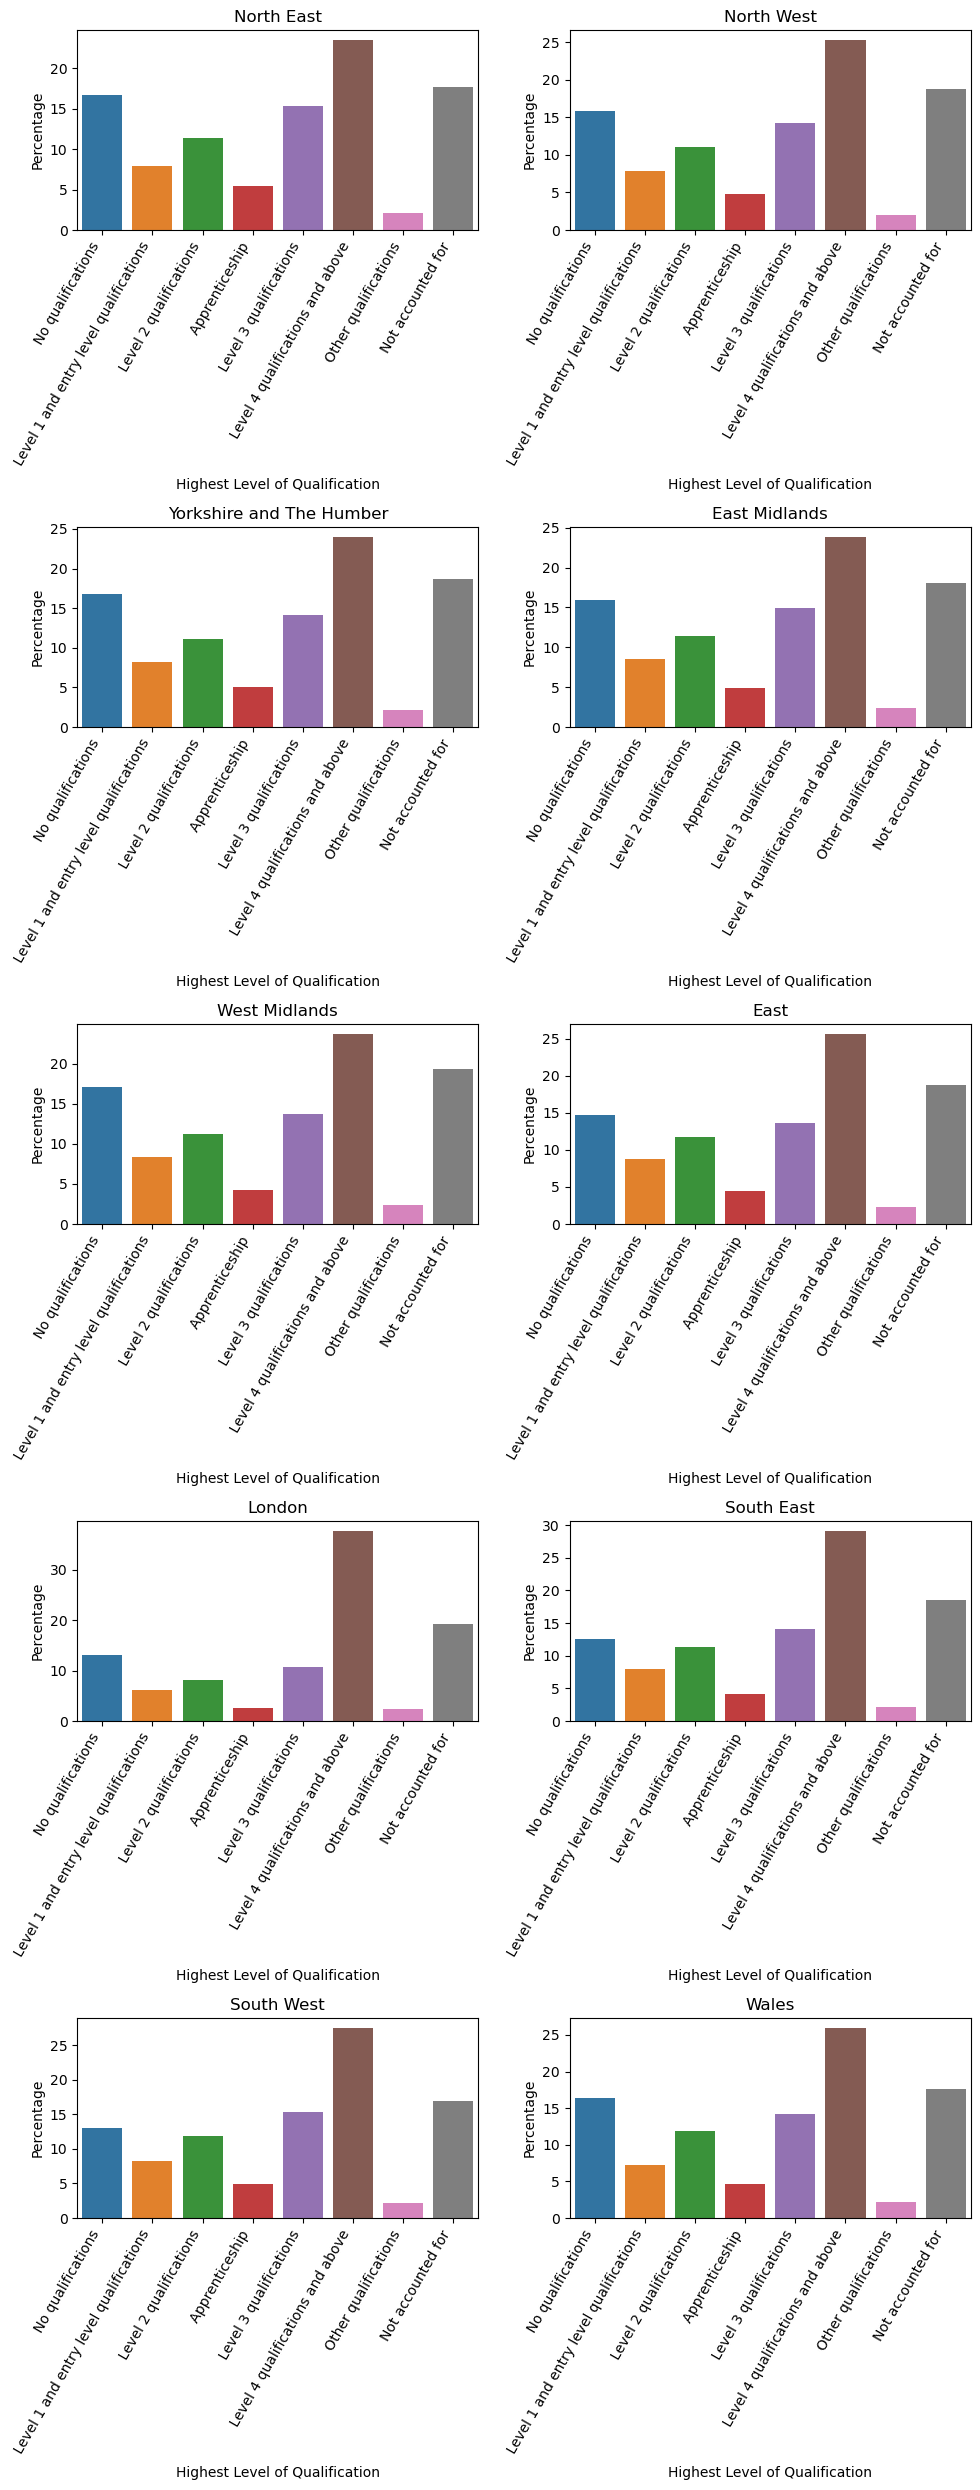

In [26]:
df_edu = factor_in_age(cleanup_all(import_data("rgn", target_groups=["Highest level of qualification"]), remove_geography=False)["TS067"])
df_edu = prob_calc(df_edu)

areas = df_edu["geography"].tolist()

df_edu
fig, ax = plt.subplots(len(areas)//2, 2, figsize=(5*2,5*len(areas)//2))
dataframes = []
for i, area in enumerate(areas):
    area_data = (
        df_edu.loc[
            df_edu["geography"] == area,
            df_edu.columns.drop(
                ["geography", "Total"]
            )
        ]
        .squeeze()
        .to_frame("Percentage")
        .reset_index(names="Highest Level of Qualification")
    )
    area_data["Highest Level of Qualification"] = (
        area_data["Highest Level of Qualification"].str.split(":")
        .apply(lambda x: x[-1])
    )
    area_data["Percentage"] *= 100
    dataframes.append(area_data)

    sns.barplot(area_data, x="Highest Level of Qualification", y="Percentage", ax=ax[i//2, i%2])
    ax[i//2, i%2].set_xticklabels(list(area_data["Highest Level of Qualification"])[:8], rotation=60, ha="right")
    ax[i//2, i%2].set_title(area)
fig.tight_layout()
areas_to_add = []
for area in areas:
    for i in range(8):
        areas_to_add.append(area)
    

df_edu = pd.concat(dataframes, axis=0)
df_edu["Region"] = areas_to_add
df_edu

c:\Users\timko\miniconda3\envs\geo_env\Lib\site-packages\seaborn\categorical.py:3025: UserWarning: catplot is a figure-level function and does not accept target axes. You may wish to try barplot
  warnings.warn(msg, UserWarning)


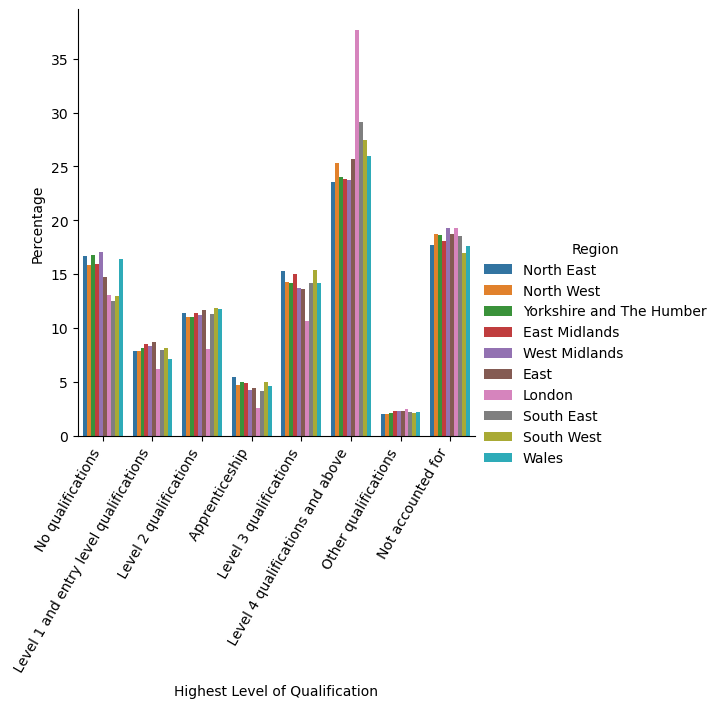

In [27]:
ax = sns.catplot(df_edu, x="Highest Level of Qualification", y="Percentage", hue="Region", kind="bar", ax=ax)
ax.set_xticklabels(list(df_edu["Highest Level of Qualification"])[:8], rotation=60, ha="right")

KeyError: "['Not Accounted For'] not found in axis"

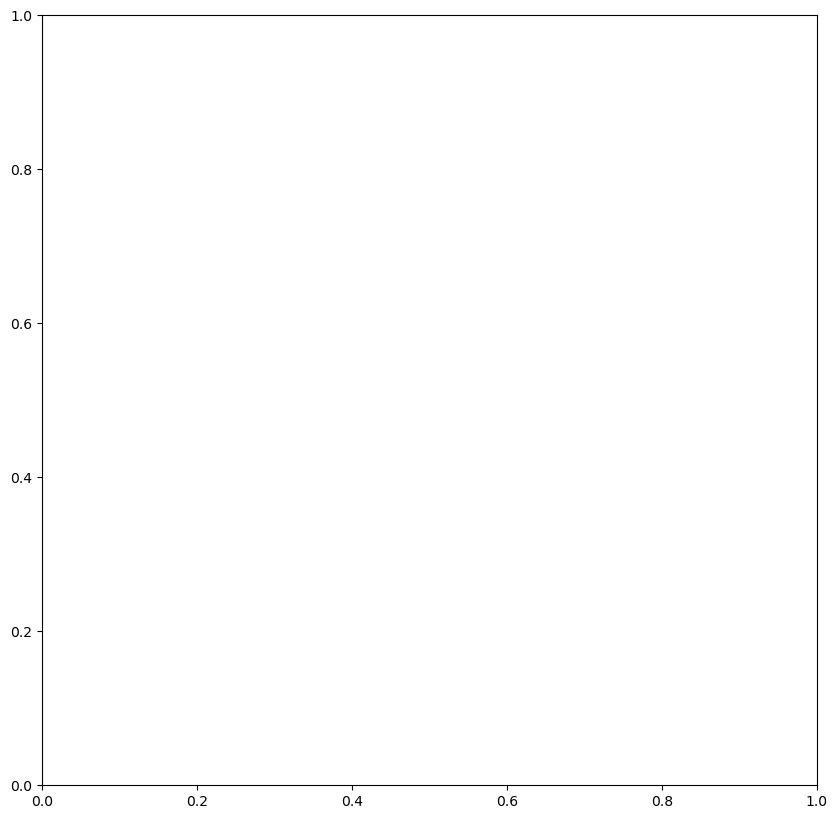

In [28]:
df_age = factor_in_age(cleanup_all(import_data("rgn", target_codes=["TS007"]), remove_geography=False)["TS007"])
##df_age = prob_calc(df_age)

areas = df_age["geography"].tolist()
columns = list(df_age.columns)
groups_to_remove = [column for column in columns if "to" in column or "under" in column or "and" in column]
groups_to_remove.pop(1)
groups_to_remove.pop(-1)
groups_to_remove
groups_to_remove.extend(["geography", "Total"])
groups_to_remove.extend(["Not Accounted For"])

def split_string(x):
    try:
        s = x[1]
    except:
        s = x[0]
    return s


fig, ax = plt.subplots(1,1, figsize=(10,10))
dataframes = []
for i, area in enumerate(areas):
    age_data = (
        df_age.loc[
            df_age["geography"] == area,
            df_age.columns.drop(
                groups_to_remove
            )
        ]
        .squeeze()
        .to_frame("Number of People")
        .reset_index(names="Age")
    )
    age_data["Age"] = (
        age_data["Age"]#.drop(index=len(age_data["Age"].index))
        .str.split(":")
        .apply(split_string)
        .str.split(";")
        .apply(lambda x: x[0])
        .apply(lambda x: [int(s) for s in x.split() if s.isdigit()][0])
    )
    age_data["Age"][0] = 0
    #print(age_data["Age"])
    #age_data["Percentage"] *= 100
    dataframes.append(age_data)
    #sns.lineplot(age_data, x="Age", y="Percentage", ax=ax[i//2, i%2])
    #ax[i//2, i%2].set_xticklabels(list(age_data["Age"]), rotation=60, ha="right")
    #ax[i//2, i%2].set_title(area)

areas_to_add = []
for area in areas:
    for i in range(len(age_data["Age"].index)):
        areas_to_add.append(area)

df_age = pd.concat(dataframes, axis=0)
df_age["Region"] = areas_to_add
sns.lineplot(df_age, x="Age", y="Number of People", hue="Region", ax=ax)
fig.tight_layout()
#ax.set_xticklabels(list(df_age["Age"])[:8], rotation=60, ha="right")
#df_edu = pd.concat(dataframes, axis=0)
#df_edu["Region"] = areas_to_add
#df_edu

In [7]:
area_size = "msoa"

In [3]:
correlations = pd.read_csv(root/"most_correlated.csv")

In [4]:
correlations.columns

Index(['Unnamed: 0', 'uid', 'variable1', 'variable2', 'coefficient', 'k1',
       'k2'],
      dtype='object')

In [5]:
k1 = correlations["k1"].values.tolist()
k2 = correlations["k2"].values.tolist()
k1.extend(k2)
all_keys = k1.copy()
all_keys = set(all_keys)

In [8]:
all_data = import_data(area_size, target_codes=all_keys)
all_data["MQY"] = pd.read_csv((root/"mean_qualification_years"/f"mqy-{area_size}.csv"))
all_data = cleanup_all(all_data, remove_geography_code=False)

c:\Users\timko\Documents\work_experience_notebooks\import_clean.py:64: UserWarning: The following codes were not imported as they are invalid: MQY
Ensure codes are in the form 'TSXXX' where X's are digits, as found on https://www.nomisweb.co.uk/census/2021/bulk
  warnings.warn(f"The following codes were not imported as they are invalid: {output_erroneous_codes}\nEnsure codes are in the form 'TSXXX' where X's are digits, as found on https://www.nomisweb.co.uk/census/2021/bulk")


KeyError: 'Highest level of qualification: Total: All usual residents aged 16 years and over'

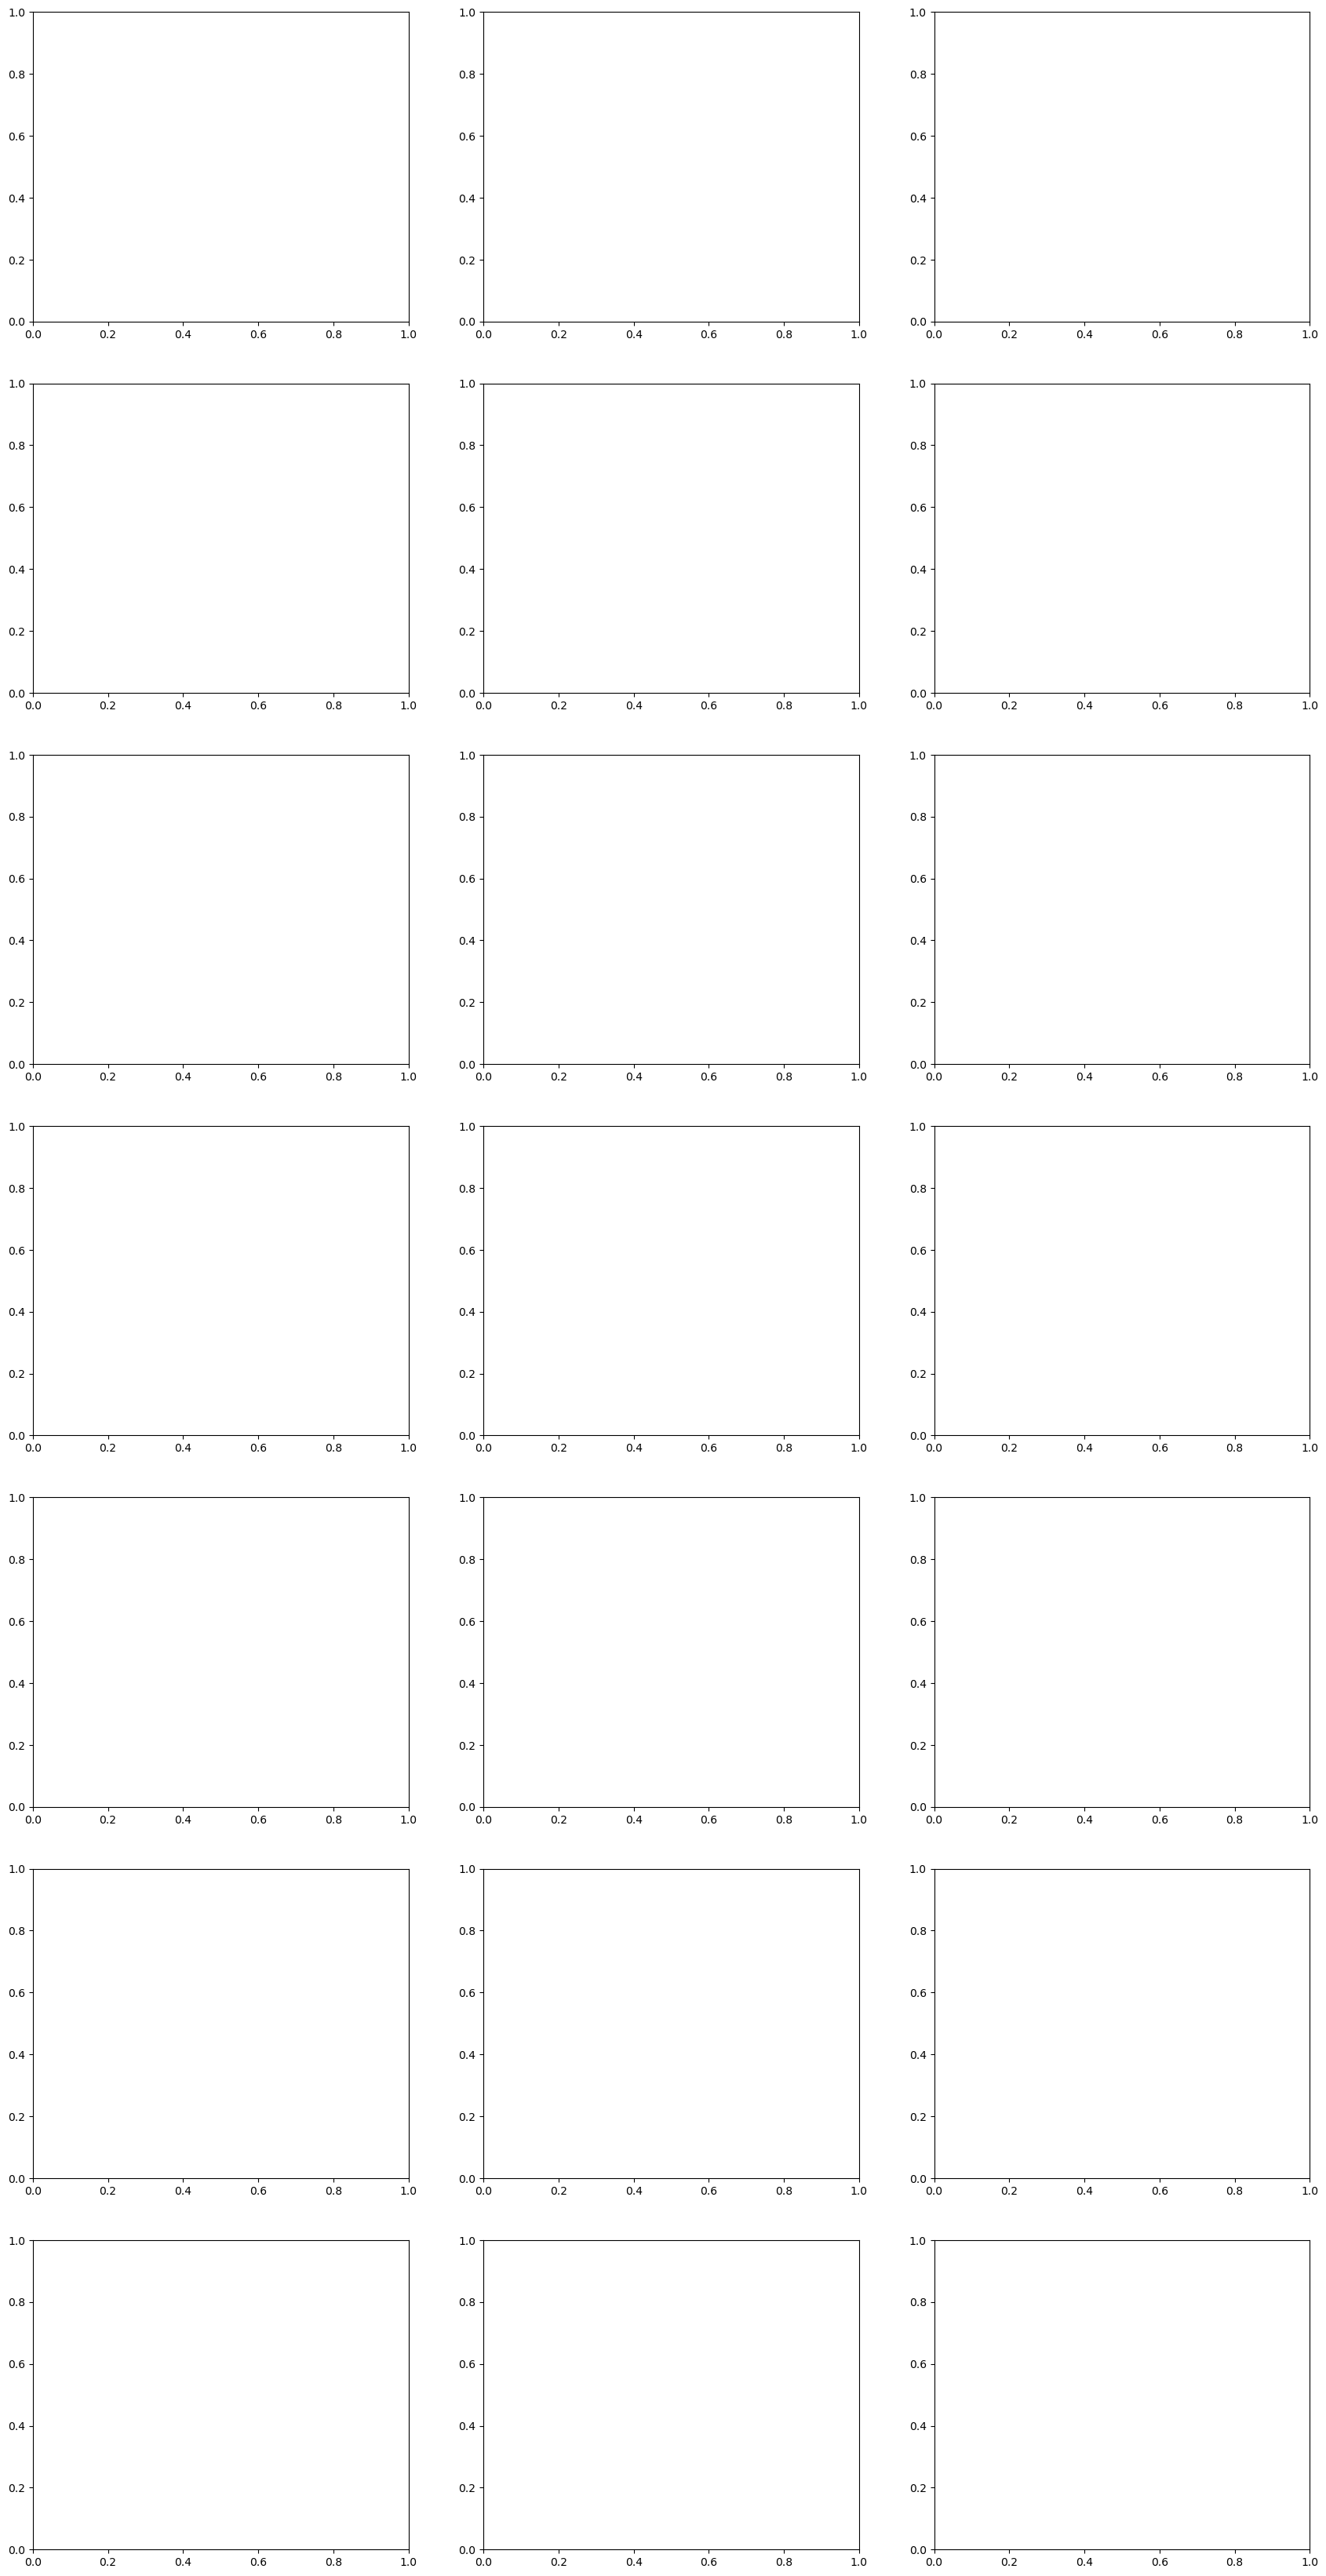

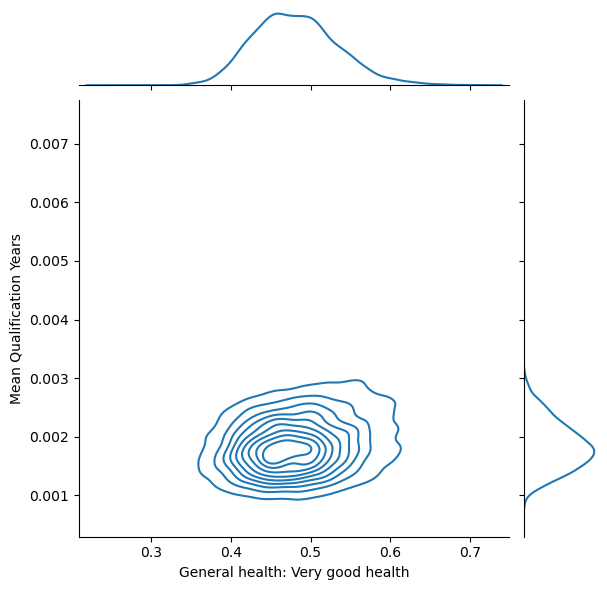

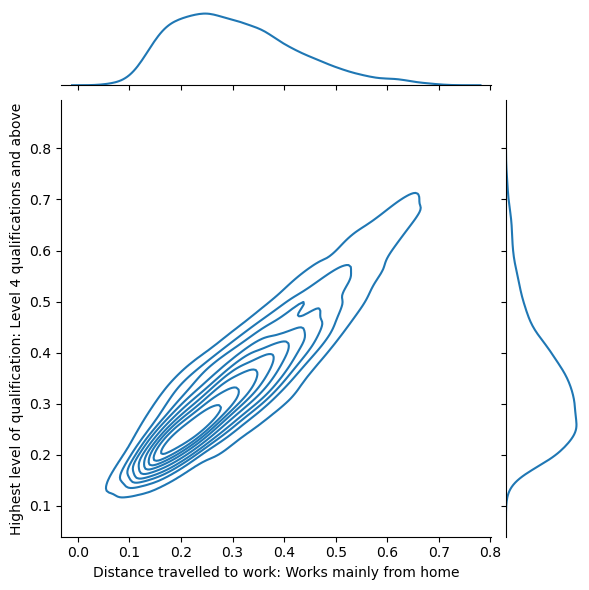

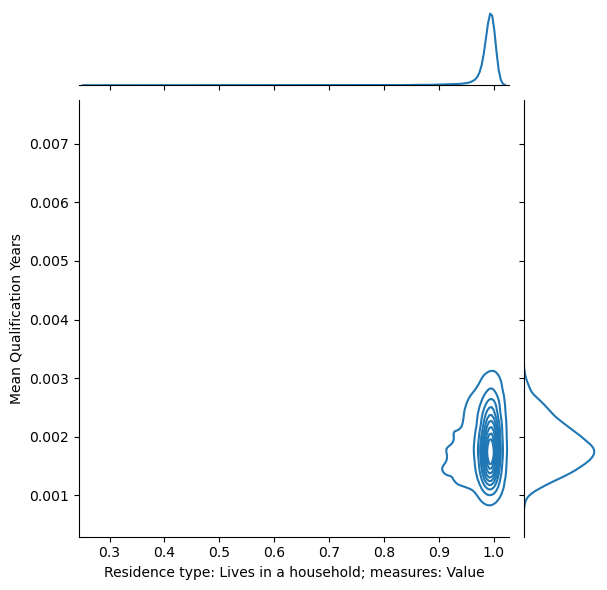

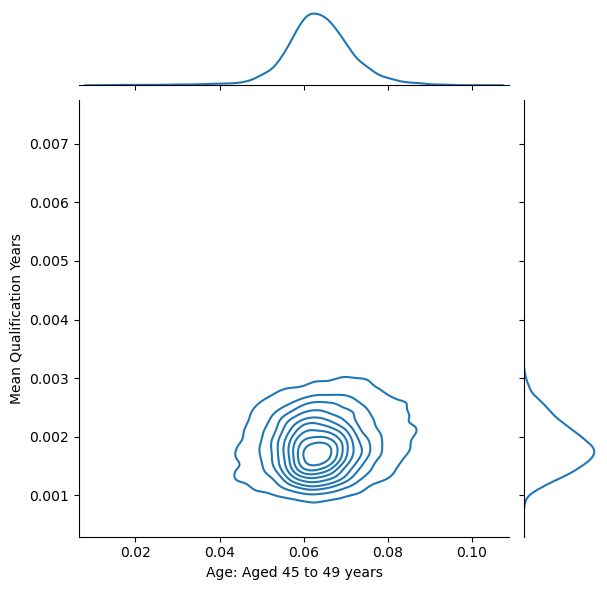

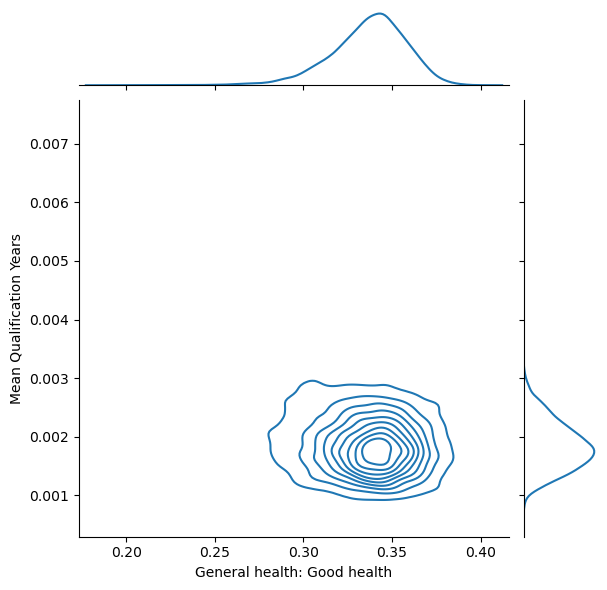

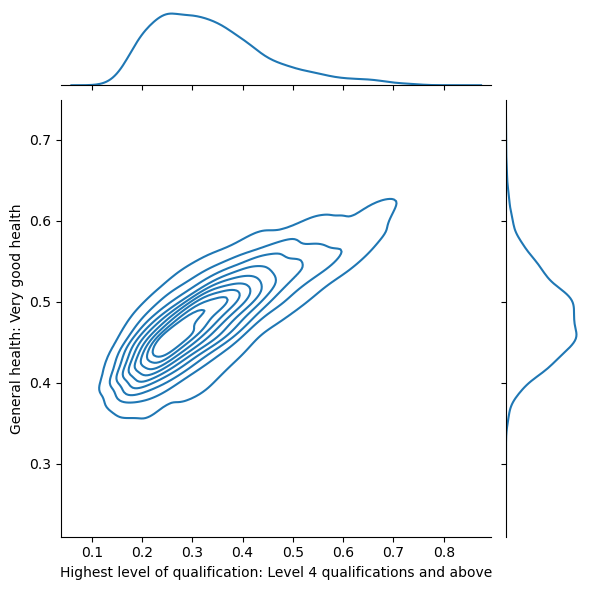

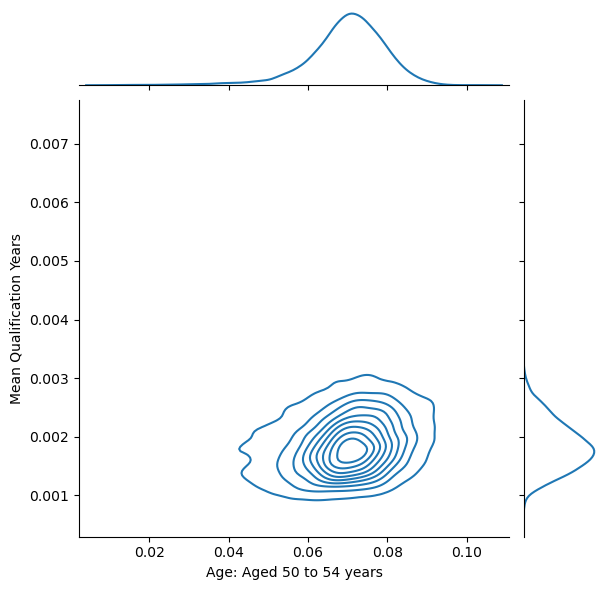

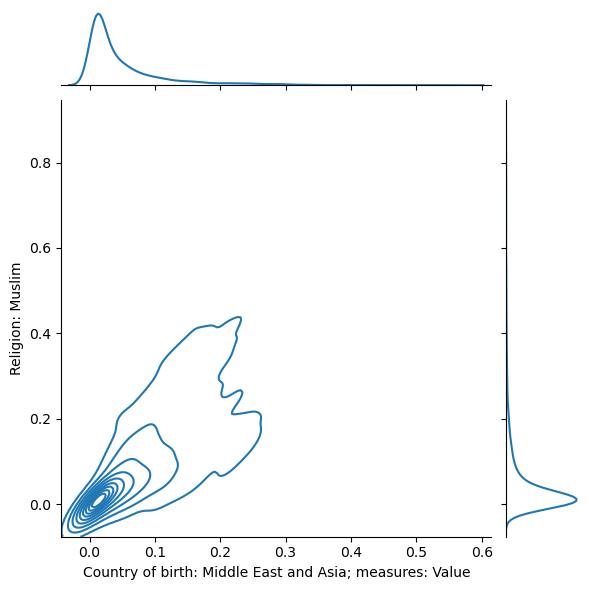

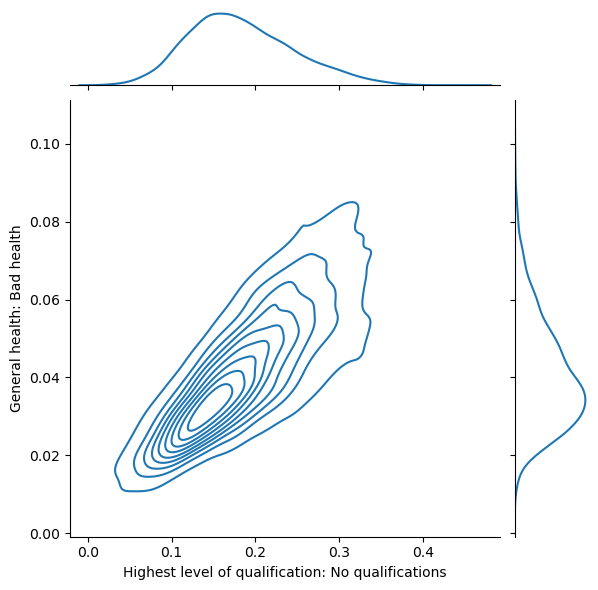

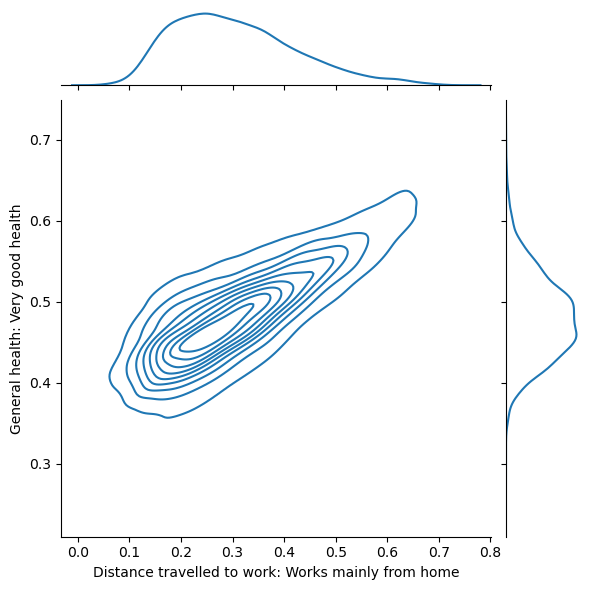

In [11]:
import math
import textwrap
num_columns = 3
num_rows = math.ceil(len(correlations.index) / num_columns)
fig, ax = plt.subplots(num_rows, num_columns, figsize=(7*num_columns, 6*num_rows))
for i in range(len(correlations.index)):
    row, col = divmod(i, num_columns)
    dataframes = [all_data[correlations.loc[i, "k1"]], all_data[correlations.loc[i, "k2"]]]
    columns = [correlations.loc[i, "variable1"], correlations.loc[i, "variable2"]]
    df_merged = dataframes[0].merge(dataframes[1], on="geography code")
    for column_set, total in zip(columns, [[column for column in df.columns if "Total" in column][0] for df in dataframes]):
        df_merged[column_set] = df_merged[column_set].divide(df_merged[total], axis=0)
    x, y = df_merged[columns[0]], df_merged[columns[1]]
    pearsons = np.corrcoef(np.array(x), np.array(y))[0][1]
    x_label = "\n".join(textwrap.wrap(columns[0], width=30))
    y_label = "\n".join(textwrap.wrap(columns[1], width=30))
    ax[row,col] = sns.jointplot(df_merged, x=x, y=y, kind="kde")
   # ax[row,col].set(xlabel=x_label, ylabel=y_label)
    
    